# Imports

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import io
from sklearn import tree
# import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
# from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# import graphviz
# import pydotplus
import io
from scipy import misc
%matplotlib inline

# Import dataset

In [45]:
data = pd.read_csv('NewSl.csv')
print(data.head(3), '\n...\n...\n...\n',data.tail(2))

   Date  Month  Year   RF  T max   T min  Avg_tem
0     1     10  2013  0.0    31.1   25.8    28.45
1     2     10  2013  0.0    31.3   27.5    29.40
2     3     10  2013  1.6    31.3   27.3    29.30 
...
...
...
       Date  Month  Year    RF  T max   T min  Avg_tem
3650    29      9  2023  60.3    29.8   23.8    26.80
3651    30      9  2023  29.6    30.4   23.5    26.95


In [46]:
data['Year'] = data.Year.astype(str)
data['Month'] = data.Month.astype(str)
data['Date'] = data.Date.astype(str)

data['date'] = data['Year'].str.cat(data['Month'], sep = '/')
data['DATE'] = data['date'].str.cat(data['Date'], sep = '/')
data.drop(columns=['Year','Month','Date','date'],axis=1,inplace=True)
data.set_index(['DATE'], inplace = True)
data.head()

,RF,T max,T min,Avg_tem
DATE,,,,
2013/10/1,0.0,31.1,25.8,28.45
2013/10/2,0.0,31.3,27.5,29.40
2013/10/3,1.6,31.3,27.3,29.30
2013/10/4,5.8,30.7,25.7,28.20
2013/10/5,0.3,30.8,24.4,27.60


In [47]:
data.dtypes

RF         float64
T max      float64
T min      float64
Avg_tem    float64
dtype: object

In [48]:
pd.to_numeric(data['Avg_tem'])

DATE
2013/10/1    28.45
2013/10/2    29.40
2013/10/3    29.30
2013/10/4    28.20
2013/10/5    27.60
             ...  
2023/9/26    28.85
2023/9/27    27.50
2023/9/28    26.65
2023/9/29    26.80
2023/9/30    26.95
Name: Avg_tem, Length: 3652, dtype: float64

# Create two separate list

In [49]:
rain = data['RF']
temp = data['Avg_tem']

In [50]:
print(rain)

DATE
2013/10/1     0.0
2013/10/2     0.0
2013/10/3     1.6
2013/10/4     5.8
2013/10/5     0.3
             ... 
2023/9/26    18.4
2023/9/27    42.4
2023/9/28    63.4
2023/9/29    60.3
2023/9/30    29.6
Name: RF, Length: 3652, dtype: float64


In [51]:
print(temp)

DATE
2013/10/1    28.45
2013/10/2    29.40
2013/10/3    29.30
2013/10/4    28.20
2013/10/5    27.60
             ...  
2023/9/26    28.85
2023/9/27    27.50
2023/9/28    26.65
2023/9/29    26.80
2023/9/30    26.95
Name: Avg_tem, Length: 3652, dtype: float64


# Creating categorical values

In [52]:
weather = []
for t,r in zip(temp, rain):
  if t >=28 and t <=29:
    if r >=6.6 and r<=8.3:
      weather.append('Normal Normal')
    elif r >8.3 :
      weather.append('Normal Wet')
    elif r <6.6:
      weather.append('Normal Dry')
  elif t<28:
    if r >=6.6 and r<=8.3:
      weather.append('Cold Normal')
    elif r >8.3 :
      weather.append('Cold Wet')
    elif r <6.6:
      weather.append('Cold Dry')
  elif t>29:
    if r >=6.6 and r<=8.3:
      weather.append('Warm Normal')
    elif r >8.3 :
      weather.append('Warm Wet')
    elif r <6.6:
      weather.append('Warm Dry')
print('Size of weather:',len(weather))

Size of weather: 3652


# Creating 'Weather' column

In [53]:
data['weather'] = weather
data.head()

,RF,T max,T min,Avg_tem,weather
DATE,,,,,
2013/10/1,0.0,31.1,25.8,28.45,Normal Dry
2013/10/2,0.0,31.3,27.5,29.40,Warm Dry
2013/10/3,1.6,31.3,27.3,29.30,Warm Dry
2013/10/4,5.8,30.7,25.7,28.20,Normal Dry
2013/10/5,0.3,30.8,24.4,27.60,Cold Dry


# Viewing number of data per category

In [54]:
print('Number of Normal Normal Weather: ',data[['weather']].query("weather == 'Normal Normal'").count())
print('Number of Normal Wet Weather: ',data[['weather']].query("weather == 'Normal Wet'").count())
print('Number of Normal Dry Weahter: ',data[['weather']].query("weather == 'Normal Dry'").count())

print('Number of Cold Normal Weather: ',data[['weather']].query("weather == 'Cold Normal'").count())
print('Number of Cold Wet Weather: ',data[['weather']].query("weather == 'Cold Wet'").count())
print('Number of Cold Dry Weahter: ',data[['weather']].query("weather == 'Cold Dry'").count())

print('Number of Warm Normal Weather: ',data[['weather']].query("weather == 'Warm Normal'").count())
print('Number of Warm Wet Weather: ',data[['weather']].query("weather == 'Warm Wet'").count())
print('Number of Warm Dry Weahter: ',data[['weather']].query("weather == 'Warm Dry'").count())

Number of Normal Normal Weather:  weather    37
dtype: int64
Number of Normal Wet Weather:  weather    230
dtype: int64
Number of Normal Dry Weahter:  weather    1079
dtype: int64
Number of Cold Normal Weather:  weather    45
dtype: int64
Number of Cold Wet Weather:  weather    411
dtype: int64
Number of Cold Dry Weahter:  weather    997
dtype: int64
Number of Warm Normal Weather:  weather    18
dtype: int64
Number of Warm Wet Weather:  weather    100
dtype: int64
Number of Warm Dry Weahter:  weather    735
dtype: int64


# Making the 'features' list

In [55]:
features = data.columns
features = [x for x in features if x != 'weather']
# features = [x for x in features if x != 'T max ']
# features = [x for x in features if x != 'T min']
features
class_names = ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry']

In [56]:
print(features)

['RF', 'T max ', 'T min', 'Avg_tem']


# Splitting data in Train and test sets

In [57]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.20, random_state=0)
print('Total Data: ', len(data))
print('Data in Train Set: ',len(train))
print('Data in Test Set: ',len(test))

Total Data:  3652
Data in Train Set:  2921
Data in Test Set:  731


In [58]:
print(train)

              RF  T max   T min  Avg_tem     weather
DATE                                                
2021/11/30   0.0    30.6   24.8    27.70    Cold Dry
2022/7/20    0.0    30.4   26.5    28.45  Normal Dry
2015/9/29   26.7    28.6   23.7    26.15    Cold Wet
2020/1/31    0.0    31.5   24.3    27.90    Cold Dry
2023/9/20    0.6    30.0   24.0    27.00    Cold Dry
...          ...     ...    ...      ...         ...
2016/1/14    0.0    31.5   23.4    27.45    Cold Dry
2022/9/8     0.0    29.1   25.2    27.15    Cold Dry
2018/4/11   13.4    31.9   24.5    28.20  Normal Wet
2020/11/20  12.2    30.4   24.2    27.30    Cold Wet
2021/3/25    0.0    31.1   25.4    28.25  Normal Dry

[2921 rows x 5 columns]


# Creating x_train, y_train, x_test, y_test datasets

In [59]:
x_train = train[features]
y_train = train["weather"]

x_test = test[features]
y_test = test["weather"]

# Applying Random Forest

In [139]:
RF = RandomForestClassifier(n_estimators=55, max_depth= 4, random_state=0)

# Fitting the Random Forest Model

In [140]:
RF = RF.fit(x_train, y_train)

# Prediction the value of y using Random Forest Model

In [141]:
y_pred = RF.predict(x_test)

In [142]:
print('Prediction data:\n', y_pred)

Prediction data:
 ['Normal Dry' 'Normal Dry' 'Warm Dry' 'Normal Dry' 'Normal Dry'
 'Cold Normal' 'Warm Dry' 'Normal Wet' 'Cold Wet' 'Cold Dry' 'Normal Dry'
 'Normal Dry' 'Warm Dry' 'Warm Dry' 'Cold Dry' 'Normal Dry' 'Normal Dry'
 'Normal Dry' 'Cold Dry' 'Normal Dry' 'Cold Wet' 'Normal Dry' 'Cold Wet'
 'Warm Dry' 'Cold Wet' 'Normal Dry' 'Cold Dry' 'Normal Dry' 'Normal Dry'
 'Cold Dry' 'Normal Wet' 'Cold Dry' 'Cold Wet' 'Warm Dry' 'Cold Wet'
 'Cold Dry' 'Normal Dry' 'Warm Dry' 'Cold Dry' 'Warm Wet' 'Warm Dry'
 'Normal Dry' 'Cold Dry' 'Cold Wet' 'Normal Dry' 'Normal Dry' 'Normal Dry'
 'Normal Dry' 'Normal Dry' 'Warm Dry' 'Normal Wet' 'Normal Wet' 'Warm Dry'
 'Warm Dry' 'Warm Dry' 'Warm Dry' 'Cold Dry' 'Cold Dry' 'Cold Dry'
 'Cold Wet' 'Cold Wet' 'Cold Dry' 'Normal Wet' 'Warm Dry' 'Normal Wet'
 'Cold Dry' 'Warm Dry' 'Normal Dry' 'Normal Dry' 'Normal Wet' 'Cold Dry'
 'Cold Dry' 'Cold Dry' 'Warm Dry' 'Normal Dry' 'Warm Dry' 'Warm Dry'
 'Warm Dry' 'Normal Dry' 'Normal Dry' 'Normal Dry' 'Warm 

# Calcultaing Accuracy of the model

In [143]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  98.6 %


# Confusing Matrix

In [144]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred, 
                            labels = ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'],
                            normalize='pred')
print(conf_mat)

[[1.         0.12280702 0.00454545 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.87719298 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.99545455 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.05263158 0.00584795]
 [0.         0.         0.         0.         0.         0.
  0.         0.94736842 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.99415205]]


# Confusion Matrix Heatmap

C:\Users\Sevindu\AppData\Local\Temp\ipykernel_5368\4285008612.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'])
C:\Users\Sevindu\AppData\Local\Temp\ipykernel_5368\4285008612.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'])


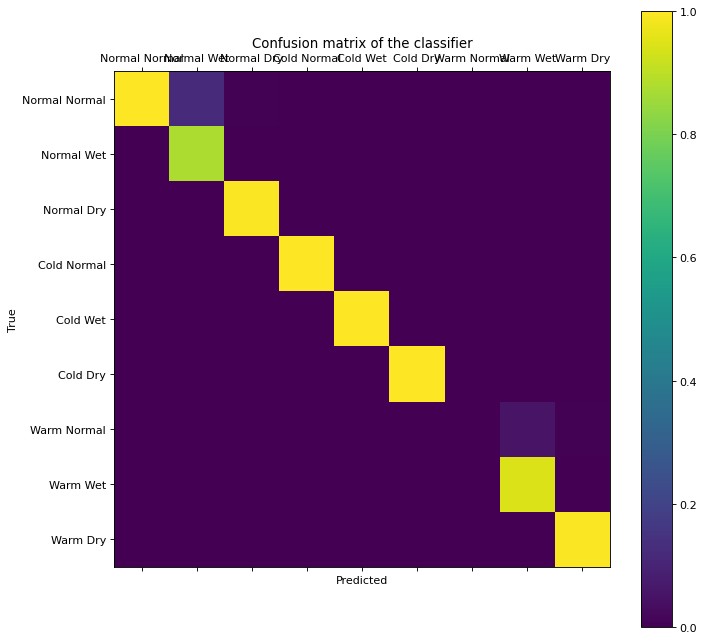

In [145]:
fig = plt.figure(figsize=(10,10), dpi =80)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'])
ax.set_yticklabels([''] + ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# A Decision tree in Random Forest

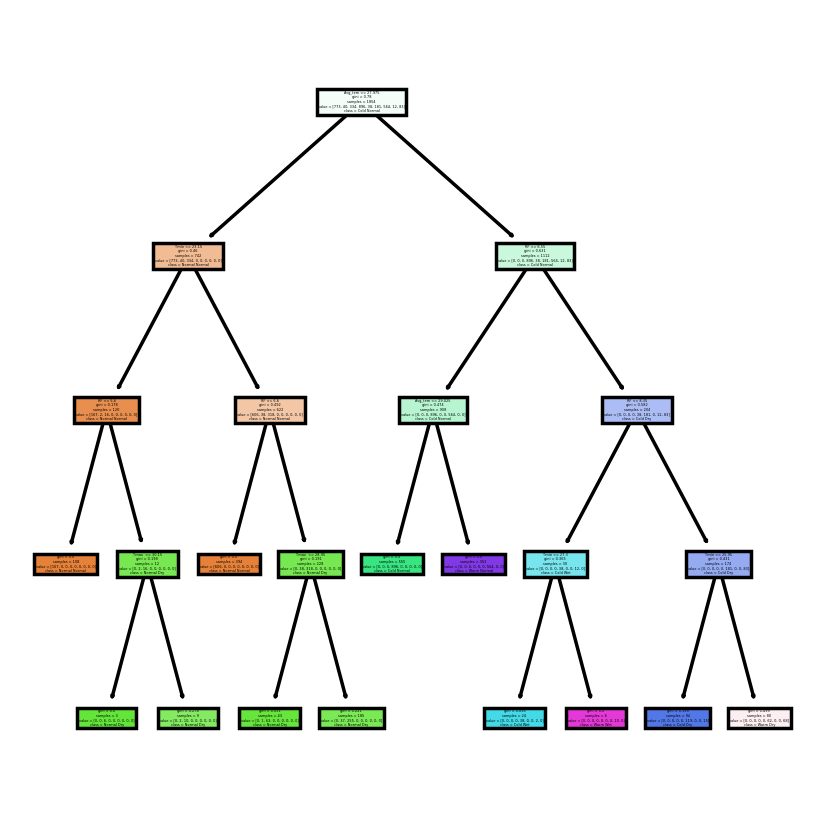

In [146]:
plt.figure(figsize= (4,4), dpi = 250)
_ = tree.plot_tree(RF.estimators_[5],
               feature_names = features, 
               class_names= class_names,
               filled = True);

# Check overfitting

In [147]:
train_accuracy = accuracy_score(y_train, RF.predict(x_train)) * 100
test_accuracy = accuracy_score(y_test, y_pred) * 100

print("Training Accuracy: ", round(train_accuracy, 1), "%")
print("Testing Accuracy: ", round(test_accuracy, 1), "%")

if train_accuracy > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model seems balanced.")

Training Accuracy:  99.1 %
Testing Accuracy:  98.6 %
The model may be overfitting.


In [148]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RF, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))

if np.mean(cv_scores) > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model seems balanced.")


Cross-Validation Scores:  [0.99316239 0.99143836 0.98630137 0.9880137  0.98458904]
Mean CV Score:  0.9887009717831635
The model seems balanced.


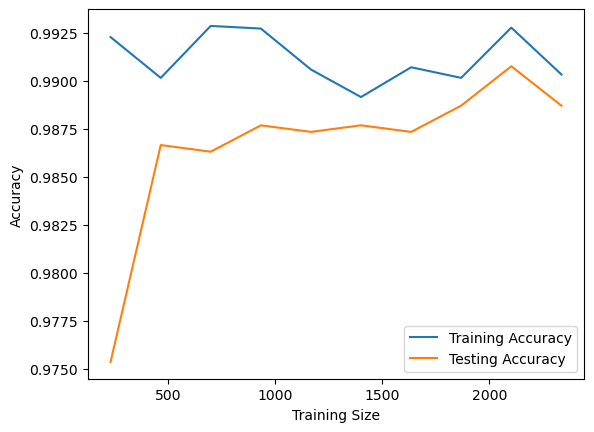

In [149]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RF, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Testing Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
